In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

c:\Users\Amir\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Amir\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\Amir\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#read train and test files
train_file = pd.read_csv('emnist-letters-train.csv')
test_file = pd.read_csv('emnist-letters-test.csv')

In [4]:
#number of columns in each train and test files
print (train_file.shape)
print(test_file.shape)
train_file.head()

(88799, 785)
(14799, 785)


,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_file["23"].value_counts()

25    3453
11    3438
5     3437
24    3437
20    3436
17    3435
16    3430
9     3428
26    3427
8     3424
22    3422
23    3422
21    3419
3     3419
18    3419
12    3415
15    3408
10    3402
13    3402
4     3398
2     3396
1     3396
6     3394
19    3392
7     3385
14    3365
Name: 23, dtype: int64

In [6]:
#generate training data from train_file
x_train = train_file.drop('23', axis=1)
y_train = train_file['23']

#generate testing data from test_file
# x_test = test_file.drop('23', axis=1)
# y_test = test_file['23']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(71039, 784)
(71039,)
(17760, 784)
(17760,)


# Visualize Training Data

In [9]:
#fit a Random Forest classifier
clf = RandomForestClassifier(criterion="gini",
                           max_depth=100,
                           min_samples_split=50,
                           random_state=5)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=50, random_state=5)

## Save the model to a file

In [ ]:
from joblib import dump, load
model_filename = 'random_forest_model.joblib'
dump(clf, model_filename)

## Load the model from the file

In [ ]:
loaded_model = load(model_filename)

In [10]:
y_pred = clf.predict(x_test)
print(y_pred)

[ 1  4 24 ...  5 12 20]


In [11]:
print("Validation Accuracy: " + str(accuracy_score(y_test, y_pred)))
precision = precision_score(y_test, y_pred, average='weighted')

Validation Accuracy: 0.8366554054054054


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

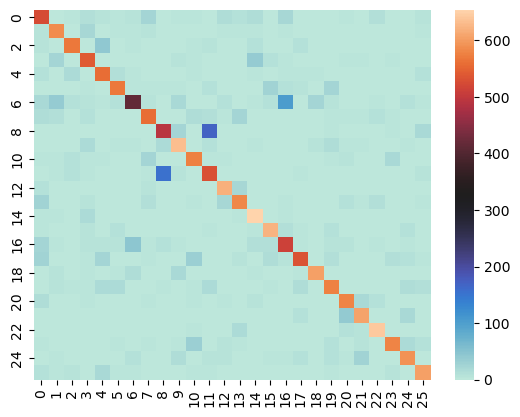

In [13]:
sns.heatmap(conf_matrix,cmap='icefire')

In [13]:
cross_val_score(clf, x_train, y_train, cv=5)

array([0.83255912, 0.83298142, 0.83002534, 0.83368525, 0.83163229])

In [48]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np


prediction_mapping = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E',
    6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
    16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'
}

def browse_file():
    # global filename_string
    filename = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")]
    )
    if filename:
        # filename_string.set(filename)  # Set the filename to the string variable
        display_image(filename)

def display_image(filename):
    image = Image.open(filename)
    image.thumbnail((500, 500))  # Resize image to fit in the window
    photo = ImageTk.PhotoImage(image)

    # Display the image in a label
    label.config(image=photo)
    label.image = photo  # Keep a reference to the image to prevent garbage collection

    # Read the image using OpenCV with the selected filename
    image_cv2 = cv2.imread(filename)
    image_cv2 = cv2.resize(image_cv2, (28, 28))  # Resize the image
    image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
    flipped_image = cv2.flip(image_gray, 1)
    image_rotated = cv2.rotate(flipped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    npImage = np.array(image_rotated).flatten()
    npImage = npImage.reshape(1, -1)  # Reshape to (1, 784) assuming it's a single image

    # Perform prediction
    predictions = clf.predict(npImage)

    # Assuming predictions is a NumPy array with a single value
    # Convert it to a single integer value
    predicted_class = int(predictions[0])

    # Map the predicted class to its alphabetical value
    alphabetical_predictions = prediction_mapping[predicted_class]

    # Update text entry with predictions
    text_entry.delete(0, tk.END)  # Clear existing text
    # text_entry.insert(0, str(predictions))  # Insert prediction result
    text_entry.insert(0, alphabetical_predictions)  # Insert prediction result

    # ayhaga = "Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100)
    # ayhaga = "Precision: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100)
    # Update additional message with information
    message_entry_accuracy.config(text="Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))  # Update text of Message widget
    message_entry_precision.config(text="Precision: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100))  # Update text of Message widget


# Create the main application window
root = tk.Tk()
root.title("Random Forest OCR")
root.geometry("800x600")  # Set initial window size

# Create a button to browse for a photo
browse_button = tk.Button(root, text="Browse Photo", command=browse_file)
browse_button.pack(pady=10)

# Create a label to display the photo
label = tk.Label(root)
label.pack()

# Add an empty text field below the image
# filename_string = tk.StringVar() # String variable to hold the filename
text_entry = tk.Entry(root)
text_entry.pack(pady=10)

message_entry_accuracy = tk.Message(root, width=300)
message_entry_accuracy.pack(pady=10)

message_entry_precision = tk.Message(root, width=300)
message_entry_precision.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()


c:\Users\Amir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Amir\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
